In [1]:
import librosa
import numpy as np
audio_path = '/home/fernando/Music/Good/Tequila_Moonrise_-_09_-_Tequila_Moonrise.mp3'
x , sr = librosa.load(audio_path)

/home/fernando/tutorial-env/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


In [2]:
import IPython.display as ipd
ipd.Audio(audio_path)

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display

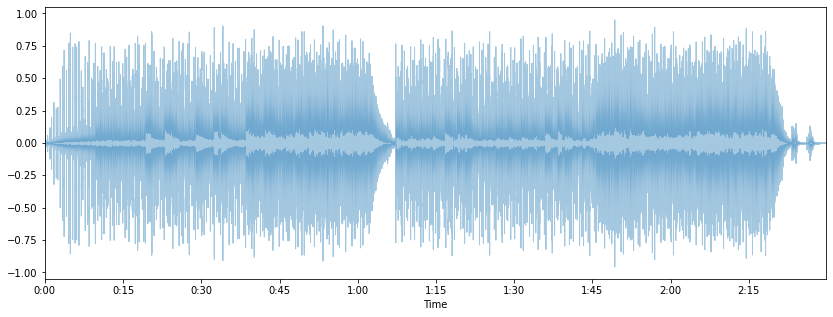

In [6]:
#In the next few lines I'll look at plots of some possible features for the neural network.
#Here, I look at the waveplot of the mp3 file.
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr, alpha = 0.4)

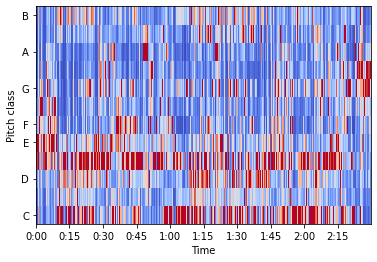

In [7]:
#Here I look at the chromograph of the waveform.  The chromograph shows how the pitch
#information of the mp3 is distributed amongst the 12 pitches {C, C♯, D, D♯, E , F, F♯, G, G♯, A, A♯, B}
#as a function of time.
chroma_stft = librosa.feature.chroma_stft(x, sr=sr)
librosa.display.specshow(chroma_stft, x_axis='time', y_axis='chroma', cmap='coolwarm')

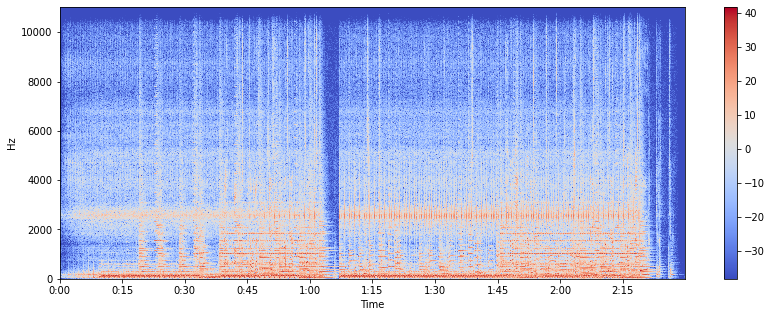

In [8]:
#Here I look at the spectrogram of the mp3 file.  The spectrogram represents the frequency
#information of the audio signal as a function of time.
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
Xdb.shape
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz') 
plt.colorbar()

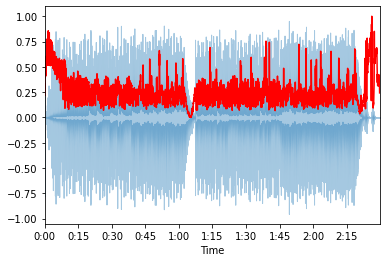

In [15]:
#This shows the spectral centroid of the mp3 file.  The spectral centroid is calculated
#as the sum of the frequencies weighted by their magnitude and normalized by their weights.
#The spectral centroid represents where the majority of the spectrum is located in frequency space
#and corresponds to the 'brightness' of a sound.
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
frames = range(len(spectral_centroids))
time = librosa.frames_to_time(frames)
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(time, normalize(spectral_centroids), color='r')

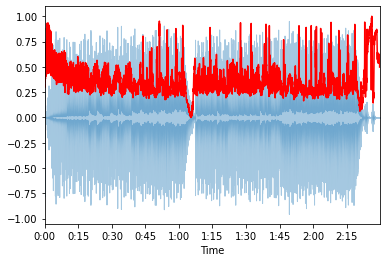

In [17]:
#Similar to the spectral centroid, the spectral rolloff contains information about the distribution
#of the spectrum.  In the case of the spectral rolloff, it represents the frequency
#below which 85% of the total energy of the spectrum resides
spectral_rolloff = librosa.feature.spectral_rolloff(x, sr=sr)[0]
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(time, normalize(spectral_rolloff), color='r')

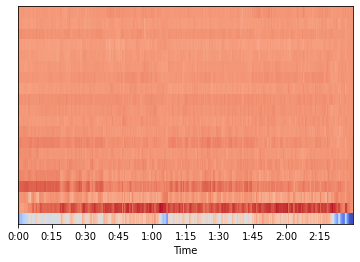

In [18]:
#The MFCC, or Mel-frequency ceptstrum, represents the fourier transform of a signal
#which has been mapped to a log-scale, and again transformed into a discrete
#cosine representation.  The terms in this discrete representation are referred to as the
#MFCC coefficients, of which 20 are typically taken.
mfccs = librosa.feature.mfcc(x, sr=sr)
librosa.display.specshow(mfccs, sr=sr, x_axis='time')